In [5]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from matplotlib.colors import ListedColormap
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons 

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [5]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [6]:
data['Embarked']=data['Embarked'].fillna('S')
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [7]:
data['Cabin']=data['Cabin'].fillna('G6')
data['Cabin']

0        G6
1       C85
2        G6
3      C123
4        G6
       ... 
886      G6
887     B42
888      G6
889    C148
890      G6
Name: Cabin, Length: 891, dtype: object

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [11]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data = data.drop(columns=columns_to_drop)

In [12]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [13]:
from sklearn.preprocessing import LabelEncoder

# Binary encode 'Sex'
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

# One-Hot encode 'Embarked' and 'Pclass'
data = pd.get_dummies(data, columns=['Embarked', 'Pclass'], drop_first=True)

In [14]:
print(f"Clean shape: {data.shape}")  # (891, 8-10)

Clean shape: (891, 10)


In [15]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [16]:
tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42, criterion="entropy")
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.5, 'x[8] <= 0.5\nentropy = 0.824\nsamples = 314\nvalue = [81.0, 233.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.0\nsamples = 144\nvalue = [72, 72]'),
 Text(0.75, 0.5, 'x[4] <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.924\nsamples = 162\nvalue = [107.0, 55.0]')]

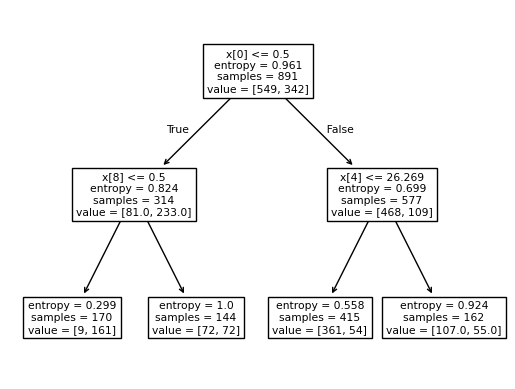

In [17]:
tree.plot_tree(tree_clf)

In [6]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=alpha, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=0.6)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.6)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)


In [7]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

In [19]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Text(3.2, 1.8, 'Depth=1')

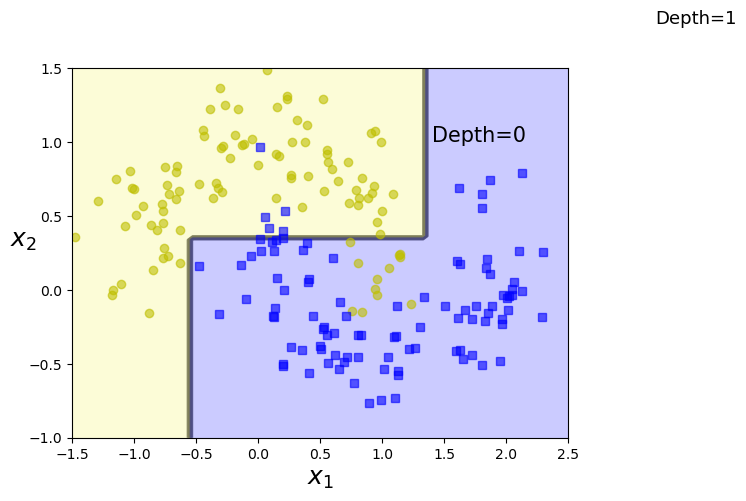

In [20]:
plot_decision_boundary(tree_clf, X, y)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)

In [21]:
tree_clf.get_depth()

2

In [22]:
for name, score in zip(["length", "wedith"], tree_clf.feature_importances_):
    print(name, score)

length 0.30576213482441483
wedith 0.6942378651755852
